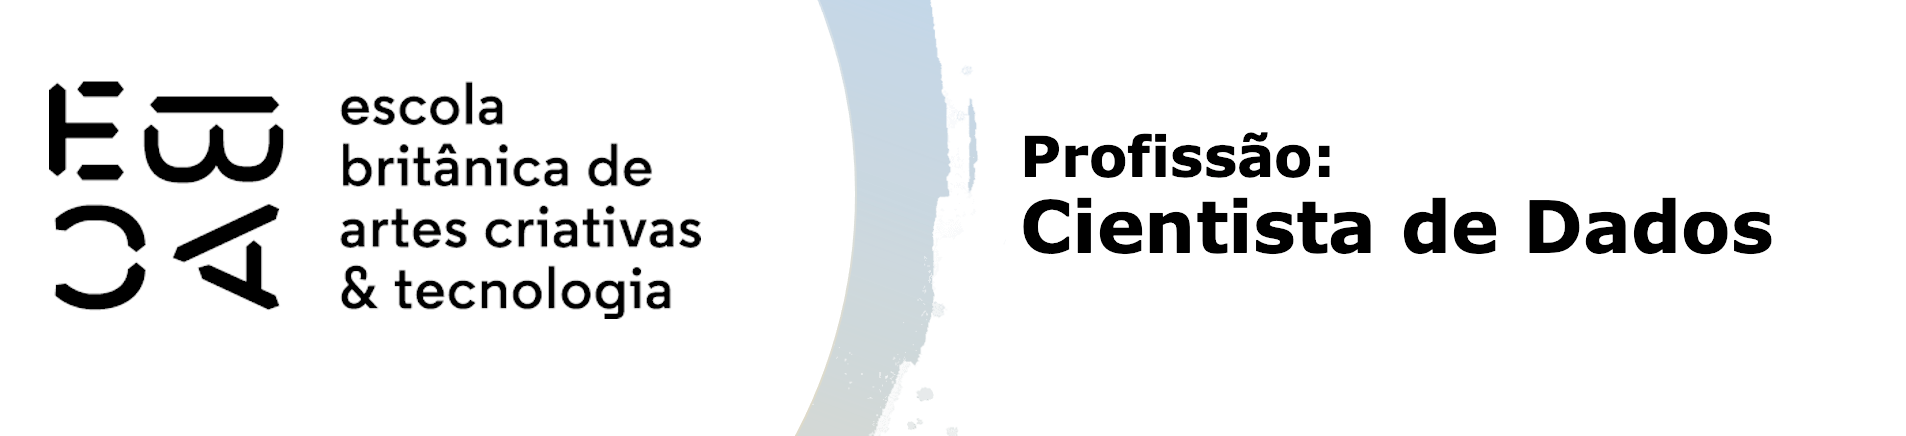

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

In [52]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [53]:
df_peng = peng.select_dtypes('number').dropna()
df_peng.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [54]:
df_peng_pad = StandardScaler().fit_transform(df_peng)

In [55]:
agg_clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [56]:
agg_clus.fit(df_peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [57]:
df_peng['grupo'] = agg_clus.labels_
df_peng

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0


In [58]:
peng_3 = peng.merge(df_peng['grupo'], how='left', on='id')

In [59]:
peng_3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


C:\Users\lucca\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


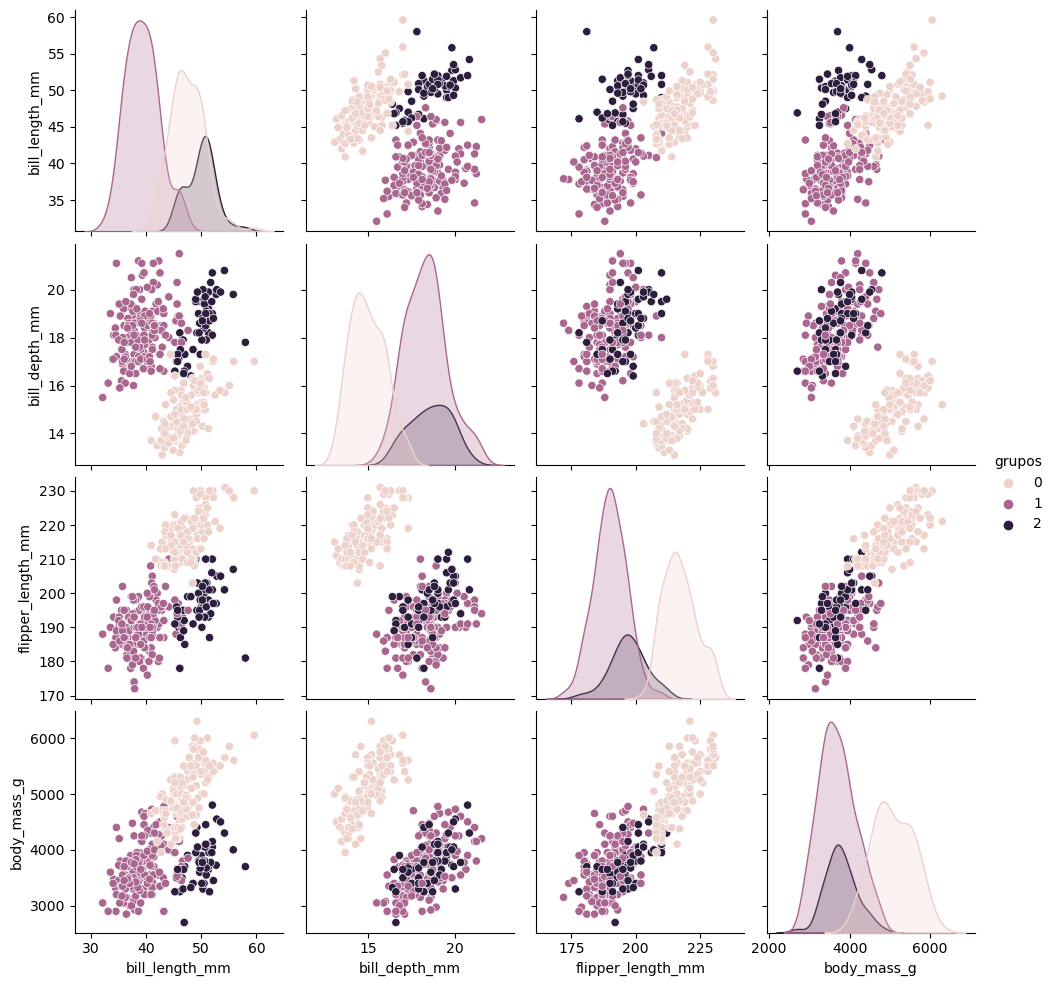

In [9]:
sns.pairplot(df_peng, hue='grupos')

In [60]:
pd.crosstab(peng_3['species'], peng_3['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


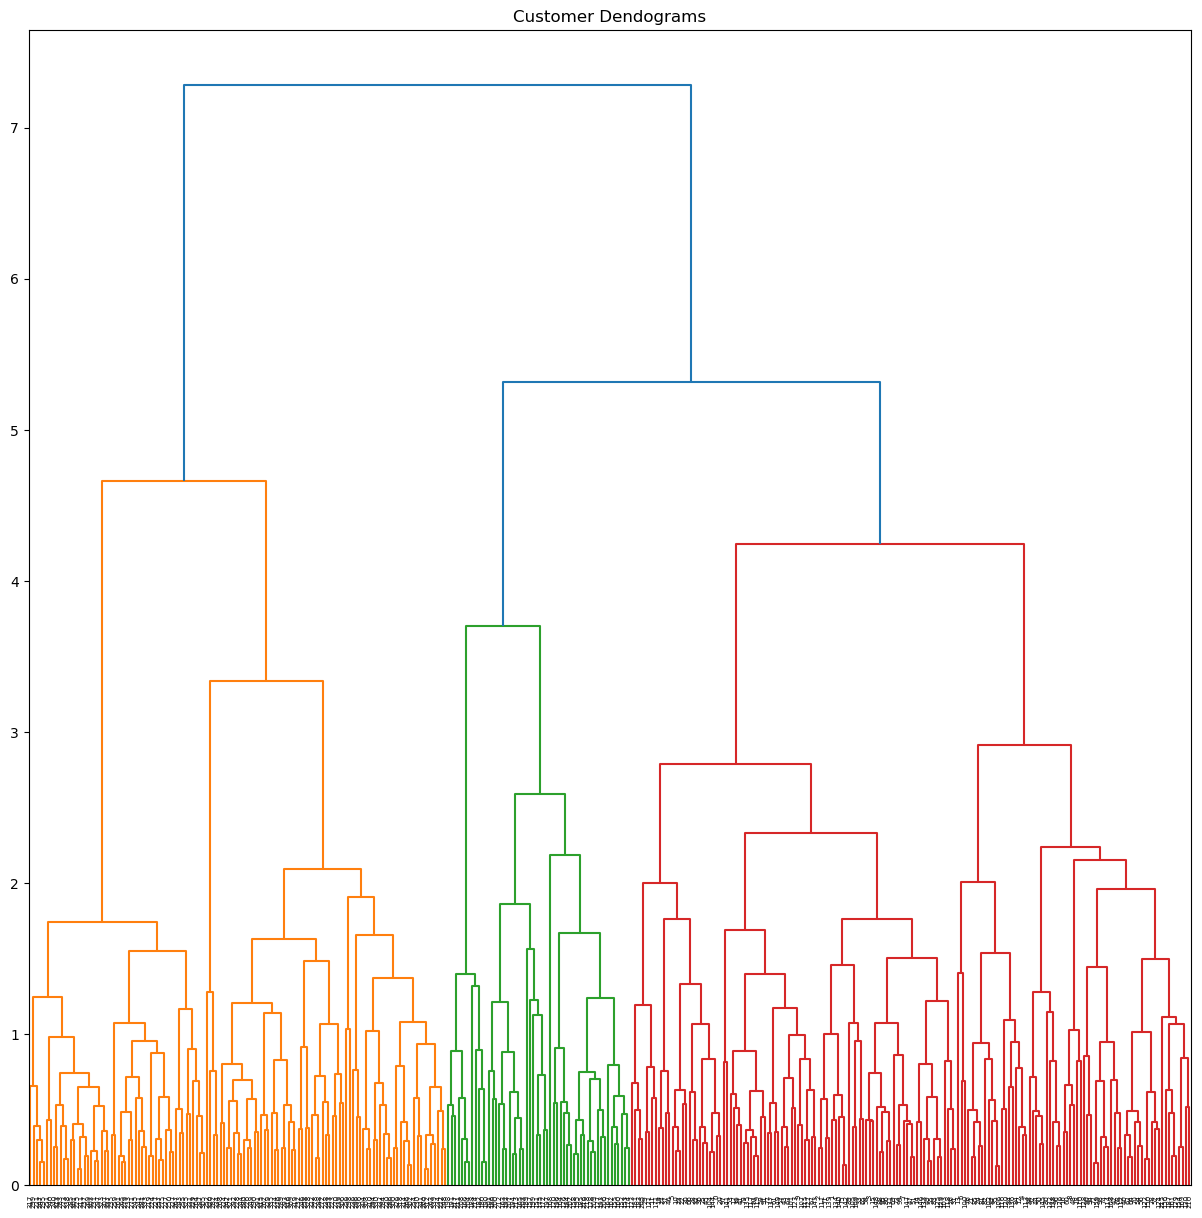

In [61]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(df_peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [62]:
pd.crosstab(peng_3['species'], peng_3['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [63]:
df_peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.798246
std,5.459584,1.974793,14.061714,801.954536,0.691547
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

## Número de Grupos = 5

In [64]:
agg_clus_5 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=5)

In [65]:
agg_clus_5.fit(df_peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [66]:
agg_clus.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
df_peng_5 = df_peng

In [68]:
df_peng_5['grupo'] = agg_clus_5.labels_
df_peng_5

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,4
1,39.5,17.4,186.0,3800.0,4
2,40.3,18.0,195.0,3250.0,4
4,36.7,19.3,193.0,3450.0,4
5,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,3
340,46.8,14.3,215.0,4850.0,3
341,50.4,15.7,222.0,5750.0,1


In [69]:
peng_5 = peng.merge(df_peng_5['grupo'], how='left', on='id')
peng_5

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,3.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.0


C:\Users\lucca\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


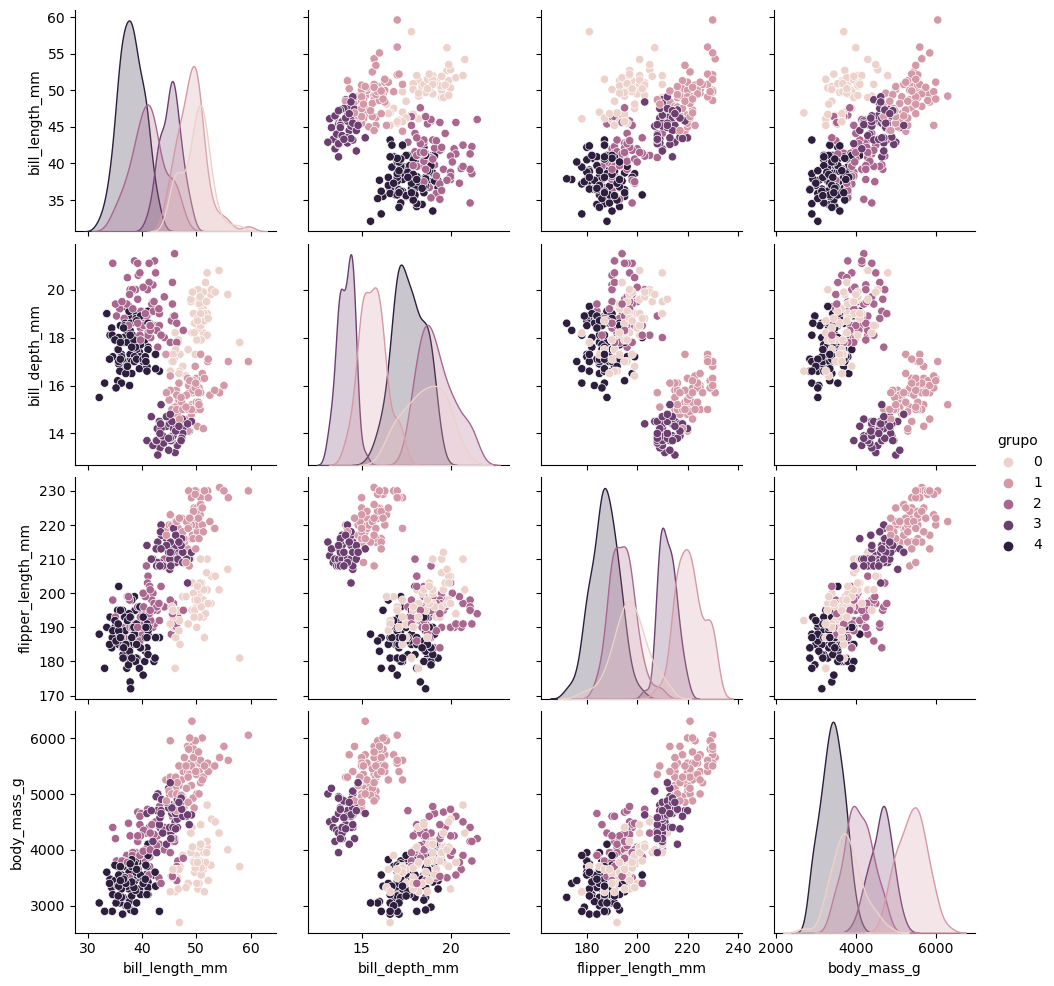

In [70]:
sns.pairplot(df_peng_5, hue='grupo')

## Cross Tab com 5 Grupos:

In [71]:
pd.crosstab(peng_5['species'], peng_5['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


## Cross Tab com 3 Grupos:

In [72]:
pd.crosstab(peng_3['species'], peng_3['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


## Cross Tab com 5 Grupos relacionado ao sexo dos Pinguins:

In [73]:
pd.crosstab(peng_5['sex'], peng_5['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
sex,,,,,
Female,20,9,13,49,74
Male,34,61,55,0,18


### Analisando as tabelas cruzadas e comparando entre elas (com 3 grupos e 5 grupos) pode-se dizer que o algoritmo conseguiu alcançar seus objetivos de separar oas grupos, apresentando pequenos ruídos nas fronteiras de algumas características físicas dos pinguins.